# Import Packages

In [22]:
import pandas as pd
import numpy as np

# package for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# package for data science
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# pandas cofiguration
pd.options.display.max_columns=50

# Import Dataset

In [2]:
df_weather = pd.read_parquet('../data/interim/weather_data_final.parquet')

df_weather.sample(5)

,id,main,description,icon,dt,main.temp,main.feels_like,main.humidity,main.temp_min,main.temp_max,wind.speed,wind.deg,wind.gust,clouds.all,rain.1h
197,800,Clear,clear sky,01d,2022-07-09 04:00:00+00:00,302.23,303.17,52,302.23,302.23,0.51,271,2.62,2,NaN
1371,804,Clouds,overcast clouds,04n,2022-08-26 19:00:00+00:00,295.27,296.04,96,295.27,298.41,0.83,190,1.14,100,NaN
2330,804,Clouds,overcast clouds,04n,2022-10-05 13:00:00+00:00,298.41,299.29,88,298.41,298.41,0.26,220,0.79,100,NaN
470,803,Clouds,broken clouds,04n,2022-07-20 12:00:00+00:00,299.71,299.71,77,299.71,301.74,1.13,216,1.60,62,NaN
270,802,Clouds,scattered clouds,03d,2022-07-12 05:00:00+00:00,305.27,309.32,56,305.27,305.27,1.73,342,1.10,44,NaN


In [3]:
df = pd.read_parquet('../data/interim/interim_data.parquet')

df.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day_name,hour,weekday,isweekend,month,pub_holiday
77012,2022-08-22 11:00:00,32.71,KOTA BOGOR,Jenderal Sudirman,2,804.0,105.0,18.035000,58,36420745,2022-08-22,2.0,"MULTILINESTRING ((106.79706 -6.593115, 106.797...",Monday,11,0,0,8,0
85133,2022-08-27 14:00:00,32.71,KOTA BOGOR,Pahlawan,3,1361.5,260.0,11.170000,52,36711269,2022-08-27,3.0,"MULTILINESTRING ((106.794985 -6.607735, 106.79...",Saturday,14,5,1,8,0
55707,2022-08-08 16:00:00,32.71,KOTA BOGOR,N9 Jalan Raya Pajajaran,2,1411.0,93.0,22.970000,139,35604359,2022-08-08,2.0,"MULTILINESTRING ((106.804404 -6.595026, 106.80...",Monday,16,0,0,8,0
66891,2022-08-15 12:00:00,32.71,KOTA BOGOR,N9 KH Soleh Iskandar,3,488.0,109.5,11.719999,16,36028070,2022-08-15,3.0,"MULTILINESTRING ((106.806074 -6.561066, 106.80...",Monday,12,0,0,8,0
23847,2022-07-21 09:00:00,32.71,KOTA BOGOR,RE Abdullah,4,187.0,171.5,3.350000,6,34435833,2022-07-21,4.0,"MULTILINESTRING ((106.779125 -6.597681, 106.77...",Thursday,9,3,0,7,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100529 entries, 0 to 100528
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   time                       100529 non-null  datetime64[ns]
 1   kemendagri_kabupaten_kode  100529 non-null  float64       
 2   kemendagri_kabupaten_nama  100529 non-null  object        
 3   street                     100529 non-null  object        
 4   level                      100529 non-null  int64         
 5   median_length              100529 non-null  float64       
 6   median_delay               100529 non-null  float64       
 7   median_speed_kmh           100529 non-null  float64       
 8   total_records              100529 non-null  int64         
 9   id                         100529 non-null  int64         
 10  date                       100529 non-null  object        
 11  median_level               100529 non-null  float64 

In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               2366 non-null   int64              
 1   main             2366 non-null   object             
 2   description      2366 non-null   object             
 3   icon             2366 non-null   object             
 4   dt               2366 non-null   datetime64[ns, UTC]
 5   main.temp        2366 non-null   float64            
 6   main.feels_like  2366 non-null   float64            
 7   main.humidity    2366 non-null   int64              
 8   main.temp_min    2366 non-null   float64            
 9   main.temp_max    2366 non-null   float64            
 10  wind.speed       2366 non-null   float64            
 11  wind.deg         2366 non-null   int64              
 12  wind.gust        2354 non-null   float64            
 13  clouds.all       2

Format datetime in df not in UTC, hence the time will be set as UTC datetime

In [6]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S', utc=True)

In [7]:
df.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day_name,hour,weekday,isweekend,month,pub_holiday
95974,2022-09-02 18:00:00+00:00,32.71,KOTA BOGOR,Veteran,3,491.0,87.0,12.23,21,37073280,2022-09-02,3.0,"MULTILINESTRING ((106.788193 -6.595608, 106.78...",Friday,18,4,0,9,0
21054,2022-07-19 10:00:00+00:00,32.71,KOTA BOGOR,N9 Otto Iskandardinata,2,725.0,91.0,16.50,3,34322100,2022-07-19,2.0,"MULTILINESTRING ((106.804446 -6.601614, 106.80...",Tuesday,10,1,0,7,0
42204,2022-07-31 19:00:00+00:00,32.71,KOTA BOGOR,Brigjen Saptadji Hadi Prawira,3,1485.0,235.0,14.12,31,35096891,2022-07-31,3.0,"MULTILINESTRING ((106.772156 -6.576599, 106.77...",Sunday,19,6,1,7,0
78066,2022-08-23 07:00:00+00:00,32.71,KOTA BOGOR,Semplak Raya,3,252.0,113.0,6.14,5,36472865,2022-08-23,3.0,"MULTILINESTRING ((106.760262 -6.547148, 106.76...",Tuesday,7,1,0,8,0
7809,2022-07-11 14:00:00+00:00,32.71,KOTA BOGOR,Pakuan,2,414.0,71.0,8.83,6,33771330,2022-07-11,2.0,"MULTILINESTRING ((106.812572 -6.599, 106.81346...",Monday,14,0,0,7,0


The weather data gathered from openweather api have interval update time 1 hour, hence the time data from df will be rounded, eg: 22:45 will be rounded to 22:00

In [8]:
df['time_rounded'] = df['time'].dt.round(freq='1h')
df['hour_rounded'] = df['time_rounded'].dt.hour

df.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,...,median_level,geometry,day_name,hour,weekday,isweekend,month,pub_holiday,time_rounded,hour_rounded
27888,2022-07-23 17:00:00+00:00,32.71,KOTA BOGOR,Semplak Raya,1,1253.0,76.0,19.16,59,34568195,...,1.0,"MULTILINESTRING ((106.760446 -6.542936, 106.76...",Saturday,17,5,1,7,0,2022-07-23 17:00:00+00:00,17
34465,2022-07-27 16:00:00+00:00,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,2,1417.0,102.0,20.75,24,34823042,...,2.0,"MULTILINESTRING ((106.751172 -6.573308, 106.75...",Wednesday,16,2,0,7,0,2022-07-27 16:00:00+00:00,16
69608,2022-08-17 10:00:00+00:00,32.71,KOTA BOGOR,N9 Cifor,3,244.0,112.0,5.73,3,36142867,...,3.0,"MULTILINESTRING ((106.754662 -6.56877, 106.754...",Wednesday,10,2,0,8,1,2022-08-17 10:00:00+00:00,10
42834,2022-08-01 09:00:00+00:00,32.71,KOTA BOGOR,Brigjen Saptadji Hadi Prawira,1,1085.0,64.0,24.18,3,35154230,...,1.0,"MULTILINESTRING ((106.7645 -6.566887, 106.7646...",Monday,9,0,0,8,0,2022-08-01 09:00:00+00:00,9
76410,2022-08-21 20:00:00+00:00,32.71,KOTA BOGOR,Jalan Lingkar Dramaga,2,881.0,86.0,14.45,7,36372057,...,2.0,"MULTILINESTRING ((106.736727 -6.573186, 106.73...",Sunday,20,6,1,8,0,2022-08-21 20:00:00+00:00,20


## Joining df with weather data

In [9]:
df.rename(columns={'time_rounded':'dt'}, inplace=True)

In [10]:
df_final = pd.merge(df, df_weather[['dt', 'main', 'rain.1h']], on='dt', how='left')

In [11]:
df_final.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,...,day_name,hour,weekday,isweekend,month,pub_holiday,dt,hour_rounded,main,rain.1h
2751,2022-07-07 19:00:00+00:00,32.71,KOTA BOGOR,N9 Raden KH Abdullah bin Nuh,2,1726.0,106.0,24.16,49,33535030,...,Thursday,19,3,0,7,0,2022-07-07 19:00:00+00:00,19,Clouds,NaN
82517,2022-08-26 07:00:00+00:00,32.71,KOTA BOGOR,N9 KH Soleh Iskandar,1,1530.0,72.5,30.42,4,36638128,...,Friday,7,4,0,8,0,2022-08-26 07:00:00+00:00,7,Clouds,NaN
85448,2022-08-27 16:00:00+00:00,32.71,KOTA BOGOR,Haji Achmad Sobana,3,332.0,97.0,7.90,11,36711534,...,Saturday,16,5,1,8,0,2022-08-27 16:00:00+00:00,16,Clouds,NaN
42590,2022-08-01 06:00:00+00:00,32.71,KOTA BOGOR,N9 KS Tubun,3,416.0,95.5,9.83,14,35154008,...,Monday,6,0,0,8,0,2022-08-01 06:00:00+00:00,6,Clouds,NaN
58134,2022-08-10 10:00:00+00:00,32.71,KOTA BOGOR,N9 Jalak Harupat,2,602.0,62.0,17.45,13,35716455,...,Wednesday,10,2,0,8,0,2022-08-10 10:00:00+00:00,10,Clouds,NaN


In [12]:
# checking data with rain
df_final.query(r"main == 'Rain'")

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,...,day_name,hour,weekday,isweekend,month,pub_holiday,dt,hour_rounded,main,rain.1h
14,2022-07-06 04:00:00+00:00,32.71,KOTA BOGOR,Tol Jagorawi,2,2927.0,115.0,31.380,1,33469034,...,Wednesday,4,2,0,7,0,2022-07-06 04:00:00+00:00,4,Rain,0.16
15,2022-07-06 04:00:00+00:00,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000,60,33469033,...,Wednesday,4,2,0,7,0,2022-07-06 04:00:00+00:00,4,Rain,0.16
16,2022-07-06 05:00:00+00:00,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000,60,33469035,...,Wednesday,5,2,0,7,0,2022-07-06 05:00:00+00:00,5,Rain,0.12
17,2022-07-06 05:00:00+00:00,32.71,KOTA BOGOR,Merdeka,2,713.0,108.5,12.105,8,33469037,...,Wednesday,5,2,0,7,0,2022-07-06 05:00:00+00:00,5,Rain,0.12
18,2022-07-06 05:00:00+00:00,32.71,KOTA BOGOR,Mawar,3,241.0,106.0,6.010,9,33469036,...,Wednesday,5,2,0,7,0,2022-07-06 05:00:00+00:00,5,Rain,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100573,2022-09-04 23:00:00+00:00,32.71,KOTA BOGOR,Kapten Yusuf,3,402.0,106.0,9.080,11,37226041,...,Sunday,23,6,1,9,0,2022-09-04 23:00:00+00:00,23,Rain,0.35
100574,2022-09-04 23:00:00+00:00,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000,60,37226042,...,Sunday,23,6,1,9,0,2022-09-04 23:00:00+00:00,23,Rain,0.35
100575,2022-09-04 23:00:00+00:00,32.71,KOTA BOGOR,N8 Jalan Raya Bogor,1,1743.0,85.0,26.820,1,37226043,...,Sunday,23,6,1,9,0,2022-09-04 23:00:00+00:00,23,Rain,0.35
100576,2022-09-04 23:00:00+00:00,32.71,KOTA BOGOR,N8 Jalan Raya Bogor,2,1801.0,184.0,19.200,11,37226044,...,Sunday,23,6,1,9,0,2022-09-04 23:00:00+00:00,23,Rain,0.35


## Checking Null Value & Duplicate

### Duplicate Values

In [13]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100584 entries, 0 to 100583
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype              
---  ------                     --------------   -----              
 0   time                       100584 non-null  datetime64[ns, UTC]
 1   kemendagri_kabupaten_kode  100584 non-null  float64            
 2   kemendagri_kabupaten_nama  100584 non-null  object             
 3   street                     100584 non-null  object             
 4   level                      100584 non-null  int64              
 5   median_length              100584 non-null  float64            
 6   median_delay               100584 non-null  float64            
 7   median_speed_kmh           100584 non-null  float64            
 8   total_records              100584 non-null  int64              
 9   id                         100584 non-null  int64              
 10  date                       100584 non-null  object      

In [14]:
df_final.duplicated().sum()

55

In [15]:
df_final[df_final.duplicated()]

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,...,day_name,hour,weekday,isweekend,month,pub_holiday,dt,hour_rounded,main,rain.1h
2994,2022-07-08 00:00:00+00:00,32.71,KOTA BOGOR,N9 KH Soleh Iskandar,3,499.0,95.0,12.889999,2,33598481,...,Friday,0,4,0,7,0,2022-07-08 00:00:00+00:00,0,Clouds,NaN
2996,2022-07-08 00:00:00+00:00,32.71,KOTA BOGOR,N9 Jalan Raya Pajajaran,2,1417.0,115.0,21.360000,1,33598479,...,Friday,0,4,0,7,0,2022-07-08 00:00:00+00:00,0,Clouds,NaN
2998,2022-07-08 00:00:00+00:00,32.71,KOTA BOGOR,Kolonel Ahmad Syam,3,508.0,92.5,12.860001,10,33598478,...,Friday,0,4,0,7,0,2022-07-08 00:00:00+00:00,0,Clouds,NaN
3000,2022-07-08 00:00:00+00:00,32.71,KOTA BOGOR,Jalan Lingkar Dramaga,1,1393.0,86.0,18.730000,1,33598476,...,Friday,0,4,0,7,0,2022-07-08 00:00:00+00:00,0,Clouds,NaN
3002,2022-07-08 00:00:00+00:00,32.71,KOTA BOGOR,Tol Jagorawi,1,1178.0,61.0,31.860000,3,33598482,...,Friday,0,4,0,7,0,2022-07-08 00:00:00+00:00,0,Clouds,NaN
3004,2022-07-08 00:00:00+00:00,32.71,KOTA BOGOR,N9 KH Soleh Iskandar,2,1631.0,136.0,22.564999,2,33598480,...,Friday,0,4,0,7,0,2022-07-08 00:00:00+00:00,0,Clouds,NaN
3006,2022-07-08 00:00:00+00:00,32.71,KOTA BOGOR,KH Soleh Iskandar (Jalur Lambat),5,167.0,-1.0,0.000000,61,33598477,...,Friday,0,4,0,7,0,2022-07-08 00:00:00+00:00,0,Clouds,NaN
13006,2022-07-15 00:00:00+00:00,32.71,KOTA BOGOR,Semplak Raya,2,583.0,63.0,15.730000,8,34019300,...,Friday,0,4,0,7,0,2022-07-15 00:00:00+00:00,0,Clouds,NaN
13008,2022-07-15 00:00:00+00:00,32.71,KOTA BOGOR,N9 Jalan Raya Pajajaran,2,567.0,68.5,14.270000,10,34019299,...,Friday,0,4,0,7,0,2022-07-15 00:00:00+00:00,0,Clouds,NaN
13010,2022-07-15 00:00:00+00:00,32.71,KOTA BOGOR,Tol Jagorawi,1,2189.0,64.0,46.850000,2,34019301,...,Friday,0,4,0,7,0,2022-07-15 00:00:00+00:00,0,Clouds,NaN


In [16]:
df_final.drop_duplicates(inplace=True)

In [17]:
df_final.duplicated().sum()

0

### Null Values

In [18]:
df_final.isna().sum()

time                             0
kemendagri_kabupaten_kode        0
kemendagri_kabupaten_nama        0
street                           0
level                            0
median_length                    0
median_delay                     0
median_speed_kmh                 0
total_records                    0
id                               0
date                             0
median_level                     0
geometry                         0
day_name                         0
hour                             0
weekday                          0
isweekend                        0
month                            0
pub_holiday                      0
dt                               0
hour_rounded                     0
main                             0
rain.1h                      92517
dtype: int64

Null value in rain.1h is because the data contain how long the rain happend, if the weather not rain, the rain.1h will be null hence we will impute null with 0

In [19]:
df_final['rain.1h'] = df_final['rain.1h'].fillna(0)

In [20]:
## renaming columns

df_final.rename(columns={'main':'weather',
                         'rain.1h':'rain_duration'}, inplace=True)

In [23]:
df_final.sample(5)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry,day_name,hour,weekday,isweekend,month,pub_holiday,dt,hour_rounded,weather,rain_duration
100257,2022-09-04 18:00:00+00:00,32.71,KOTA BOGOR,Surya Kencana,3,827.0,153.0,12.070000,1,37225729,2022-09-04,3.0,"LINESTRING (106.799491 -6.604398, 106.800465 -...",Sunday,18,6,1,9,0,2022-09-04 18:00:00+00:00,18,Clouds,0.0
39378,2022-07-30 14:00:00+00:00,32.71,KOTA BOGOR,Pulo Empang,3,590.0,242.0,6.220000,59,35022658,2022-07-30,3.0,"MULTILINESTRING ((106.791788 -6.607135, 106.79...",Saturday,14,5,1,7,1,2022-07-30 14:00:00+00:00,14,Clouds,0.0
79962,2022-08-24 11:00:00+00:00,32.71,KOTA BOGOR,N9 Otto Iskandardinata,2,702.0,68.0,18.910000,20,36525807,2022-08-24,2.0,"MULTILINESTRING ((106.805156 -6.601706, 106.80...",Wednesday,11,2,0,8,0,2022-08-24 11:00:00+00:00,11,Clouds,0.0
30815,2022-07-25 09:00:00+00:00,32.71,KOTA BOGOR,N9 Ir Haji Juanda,2,1125.5,70.5,23.619999,2,34705266,2022-07-25,2.0,"LINESTRING (106.793865 -6.597218, 106.79396 -6...",Monday,9,0,0,7,0,2022-07-25 09:00:00+00:00,9,Clouds,0.0
66663,2022-08-15 10:00:00+00:00,32.71,KOTA BOGOR,Tol Lingkar Luar Bogor,3,1123.0,172.0,16.605000,8,36027893,2022-08-15,3.0,"MULTILINESTRING ((106.800127 -6.562165, 106.80...",Monday,10,0,0,8,0,2022-08-15 10:00:00+00:00,10,Clouds,0.0


# Exploratory Data Analysis

Model yang akan dibuat adalah model yang dapat memprediksi tingkat kemacetan berdasarkan level yang diberikan dengan menggunakan data-data eksternal tambahan yang mungkin berguna, yaitu public holiday dan cuaca ketika terjadinya kemacetan, sehingga yang menjadi label adalah kolom level

## Pengecekan pada label

Text(0, 0.5, '#Records')

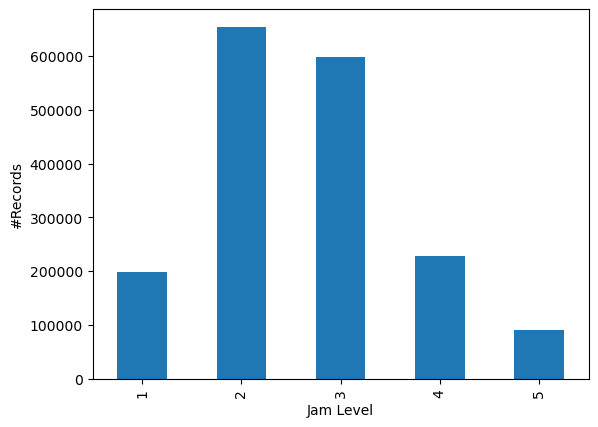

In [33]:
df_final.groupby(['level'])['total_records'].sum().sort_index().plot(kind='bar')
plt.xlabel('Jam Level')
plt.ylabel('#Records')

Terlihat pada distribusi kejadian kemacetan per level, kelas yang menjadi label imbalance, dan ada beberapa kelas yang sebenarnya bisa digabung, yaitu kelas 1 dan 2, serta 3 dan 4 karena kriteria kemacetannya saling berdekatan

In [39]:
df_final['level_new'] = df_final['level'].astype(str).replace({'2':'1',
                                                '3':'2',
                                                '4':'3',
                                                '5':'3'}).astype(int)

Text(0, 0.5, '#Records')

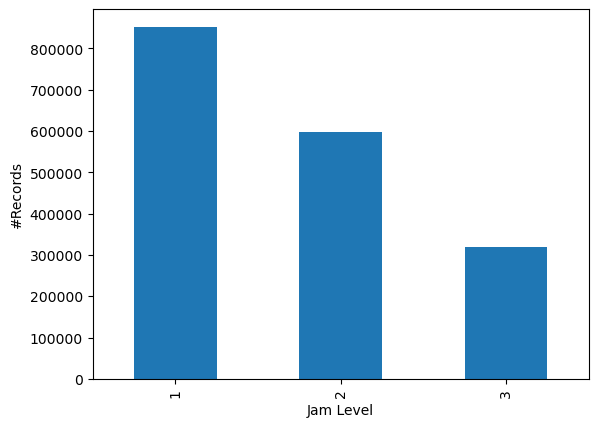

In [41]:
df_final.groupby(['level_new'])['total_records'].sum().sort_index().plot(kind='bar')
plt.xlabel('Jam Level')
plt.ylabel('#Records')

## Pada jalan manakah yang menjadi pusat macet di kota Bogor selama Juli - September 2022?

In [56]:
df_final.groupby(['street']).agg({'total_records':np.sum}).sort_values(by='total_records', ascending=False)[0:20]

,total_records
street,
N9 Jalan Raya Pajajaran,142997
N9 Jalan Raya Dramaga,128856
N9 Jalan Raya Tajur,102628
N9 Raden KH Abdullah bin Nuh,102381
N8 Jalan Raya Bogor,92662
KH Soleh Iskandar (Jalur Lambat),91250
N9 KH Soleh Iskandar,53544
Jenderal Sudirman,50100
Letjen Ibrahim Adjie,49970


## Pada hari apa sering terjadi kemacetan

In [57]:
df_final.groupby(['day_name']).agg({'total_records':np.sum}).sort_values(by='total_records', ascending=False)

,total_records
day_name,
Saturday,384922
Sunday,279640
Friday,257172
Wednesday,223563
Thursday,221929
Monday,201180
Tuesday,200144


## Pada jam berapa kemacetan sering terjadi?

<AxesSubplot: xlabel='hour'>

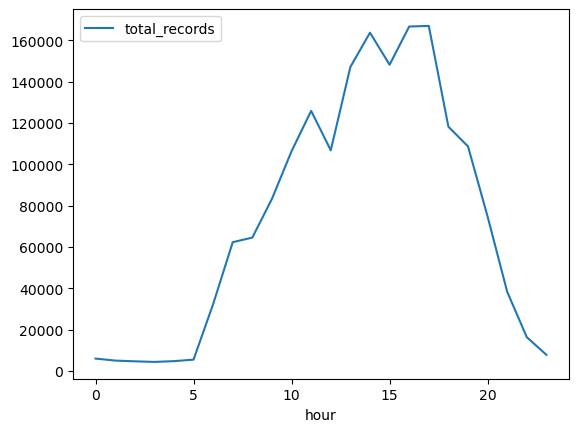

In [63]:
df_final.groupby(['hour']).agg({'total_records':np.sum}).sort_index().plot()